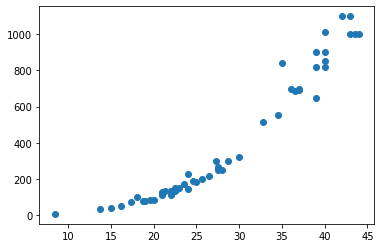

(42, 1) (14, 1)
[1033.33333333]


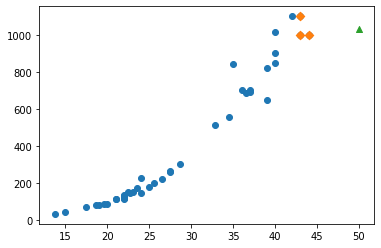

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

plt.scatter(perch_length, perch_weight)
plt.show()

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

#2차원 배열 바꿔
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)

#k-최근접회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target)

print(knr.predict([[50]]))
#[1033.33333333]

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50,1033, marker='^')
plt.show() #오류



[1241.83860323]
(42, 2) (14, 2)
[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


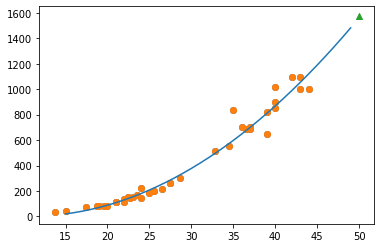

0.9706807451768623
0.9775935108325122


In [22]:
#선형 회귀
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

print(lr.predict([[50]]))
#[1241.83860323]

plt.scatter(train_input, train_target)

train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly.shape, test_poly.shape)

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

print(lr.coef_, lr.intercept_)

#구간별 직선을 그리기 위해 15에서 49까지 정수배열
point = np.arange(15,50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
plt.scatter(50,1574, marker='^')
plt.show()

print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))